### How to interact with Interactive Broker
1. Walk through grabbing data from IB using the ib_insync library.
2. Walk through working with pandas dataframes.
- [IB API](https://interactivebrokers.github.io/tws-api/index.html#gsc.tab=0)
- [IB insync](https://github.com/erdewit/ib_insync)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path: walkthrough.ipynb
# Installing package to work with IB Gateway
from ib_insync import *

Open CSV file from previos request

In [2]:
df = pd.read_csv('EURUSD.csv')
df.head()

,date,open,high,low,close,volume,average,barCount
0,2023-08-10 17:15:00-04:00,1.09825,1.09845,1.09790,1.09840,-1.0,-1.0,-1
1,2023-08-10 18:00:00-04:00,1.09840,1.09845,1.09810,1.09830,-1.0,-1.0,-1
2,2023-08-10 19:00:00-04:00,1.09830,1.09850,1.09815,1.09820,-1.0,-1.0,-1
3,2023-08-10 20:00:00-04:00,1.09820,1.09890,1.09800,1.09880,-1.0,-1.0,-1
4,2023-08-10 21:00:00-04:00,1.09880,1.09980,1.09870,1.09945,-1.0,-1.0,-1


Now to add additional columns of other data we want to see. We will add the following columns:
- 1. The 20 day moving average
- 2. The 50 day moving average

In [3]:
df['20_day_ma'] = df['close'].rolling(20).mean()
df['50_day_ma'] = df['close'].rolling(50).mean()

Using Seaborn or Matplotlib to visualize the data, we can chart the moving averages against the actual price of the stock. In this case, we will use the 20 day moving average and the 50 day moving average, and look for 20 day divergence from the 50 day moving average. This is a common technical trading strategy, but rudimentary. We will use it as an example of how to use the data we have collected.

<Axes: >

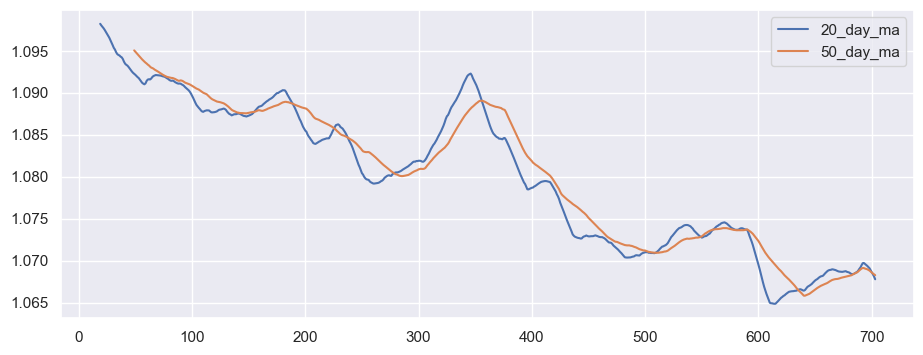

In [4]:
# Plot the 20 and 50 day moving averages
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11,4)})
df[['20_day_ma','50_day_ma']].plot(figsize=(11,4), legend=True)

Additional information such as volatility, volume, and other technical indicators can be added to the dataframe and used to make trading decisions.

<Axes: >

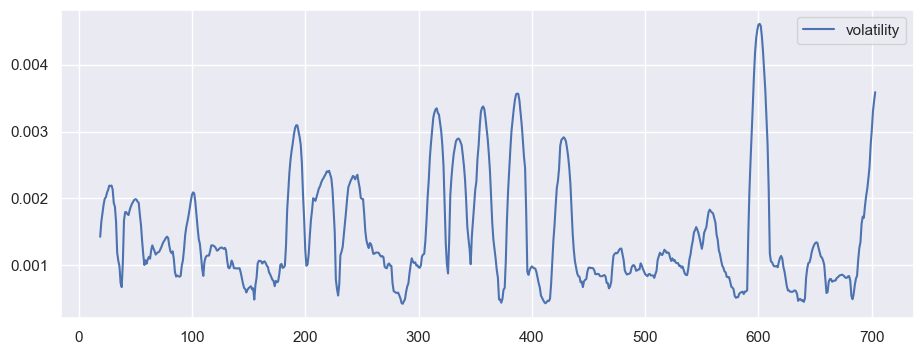

In [5]:
df['volatility'] = df['close'].rolling(20).std()
#Plot volatility with a histogram
df['volatility'].plot(figsize=(11,4), legend=True)